In [1]:
import torch
from diffusers import StableDiffusionPipeline, DDIMScheduler
import matplotlib.pyplot as plt 

/home/rishubhp/miniconda3/envs/vaibhav/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/rishubhp/miniconda3/envs/vaibhav/lib/python3.11/site-packages/xformers/ops/fmha/flash.py:211: FutureWarning: `torch.library.impl_abstract` was renamed to `torch.library.register_fake`. Please use that instead; we will remove `torch.library.impl_abstract` in a future version of PyTorch.
  @torch.library.impl_abstract("xformers_flash::flash_fwd")
/home/rishubhp/miniconda3/envs/vaibhav/lib/python3.11/site-packages/xformers/ops/fmha/flash.py:344: FutureWarning: `torch.library.impl_abstract` was renamed to `torch.library.register_fake`. Please use that instead; we will remove `torch.library.impl_abstract` in a future version of PyTorch.
  @torch.library.impl_abstract("xformers_flash::flash_bwd")


In [2]:
BS = 8 

In [3]:
# Load the model
model_id = "stabilityai/stable-diffusion-2-1"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)

# Set the DDIM scheduler
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)

# Move the pipeline to GPU
pipe = pipe.to("cuda")

Loading pipeline components...: 100%|██████████| 6/6 [00:01<00:00,  4.27it/s]


In [42]:
# Define your prompt
prompts = ["a photo of a cat and a shoe on the carpet"] * BS  

In [43]:
with torch.no_grad():
    images = pipe(prompts).images 

100%|██████████| 50/50 [00:23<00:00,  2.17it/s]


Text(0.5, 0.98, 'a photo of a cat and a shoe on the carpet')

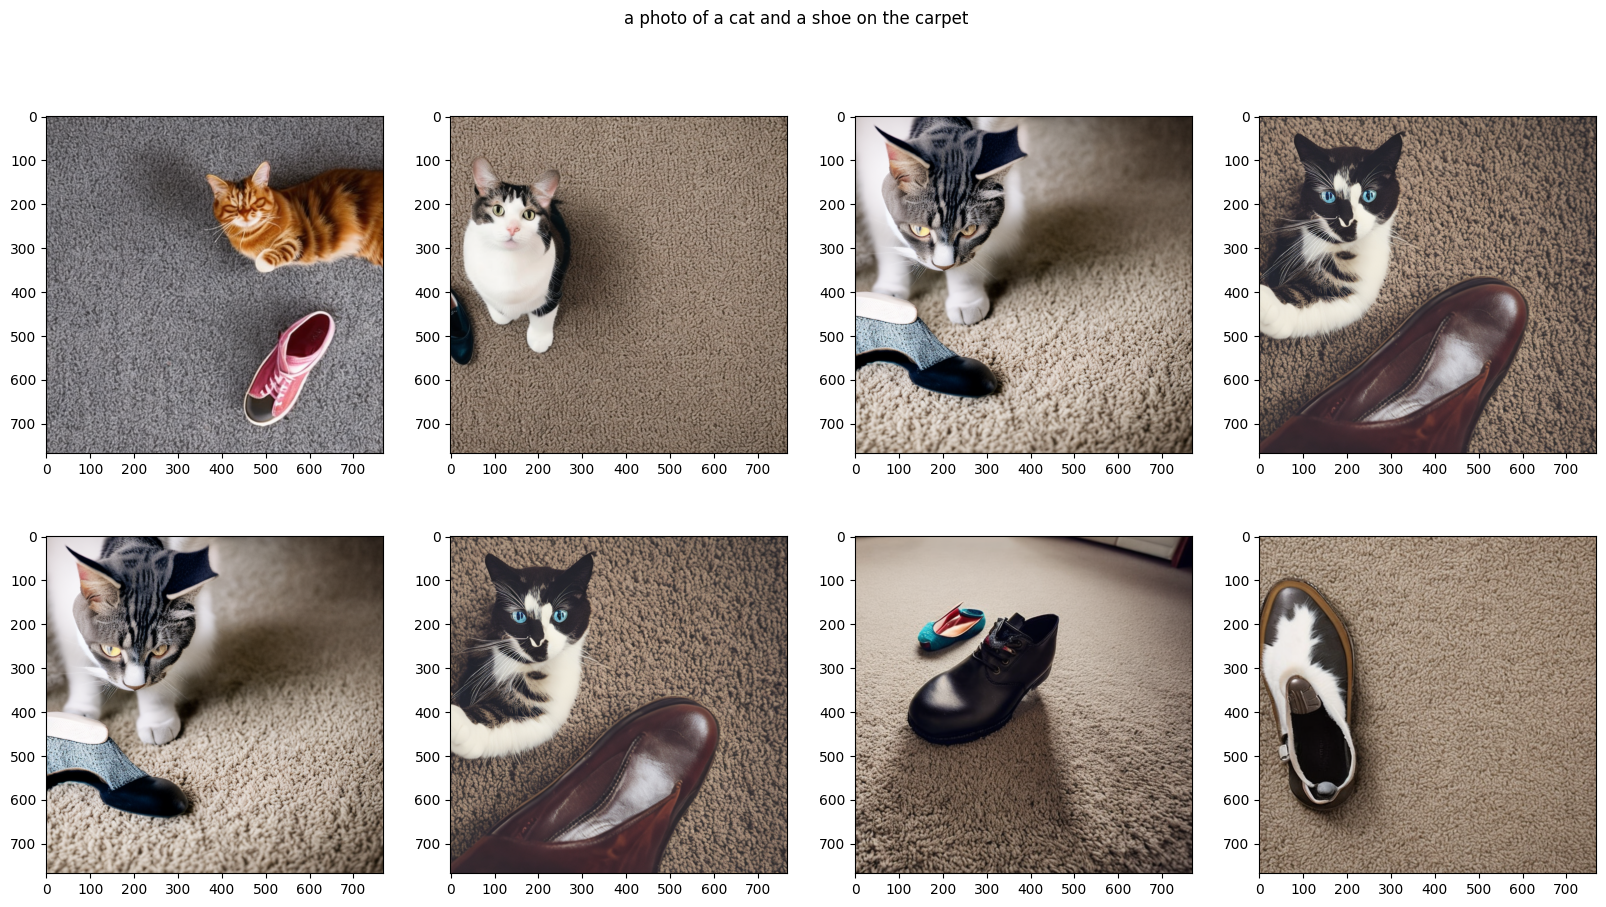

In [44]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10)) 
for row in range(2): 
    for col in range(4): 
        axs[row, col].imshow(images[row * 2 + col]) 
fig.suptitle(prompts[0]) 